<a href="https://colab.research.google.com/github/chonsawat/AI-HumanDetection/blob/master/Yolov5Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd ~/AI-HumanDetection/yolov5
%pip install -qr requirements.txt  # install

/home/jovyan/AI-HumanDetection/yolov5
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import cv2
from yolov5 import utils
display = utils.notebook_init()  # checks
import matplotlib.pyplot as plt
%matplotlib inline

YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 2g.10gb, 9856MiB)


Setup complete ✅ (80 CPUs, 503.6 GB RAM, 219.5/1757.9 GB disk)


In [3]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
# model.classes = [0]  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs

Using cache found in /home/jovyan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 2g.10gb, 9856MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


  0%|          | 0.00/476k [00:00<?, ?B/s]

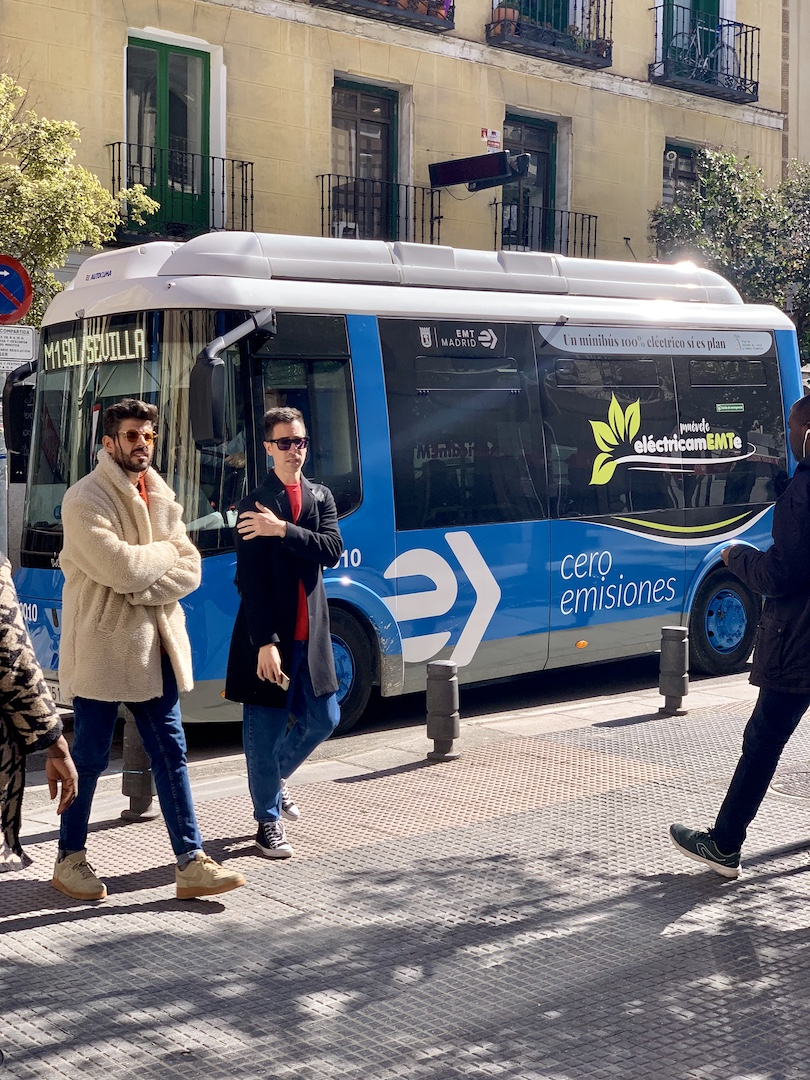

In [4]:
# Images
torch.hub.download_url_to_file('https://ultralytics.com/images/bus.jpg', 'bus.jpg')  # download 2 images
display.Image(filename='bus.jpg', width=600)

image 1/1: 1080x810 4 persons, 1 bus
Speed: 9.7ms pre-process, 19.8ms inference, 2.2ms NMS per image at shape (1, 3, 640, 480)


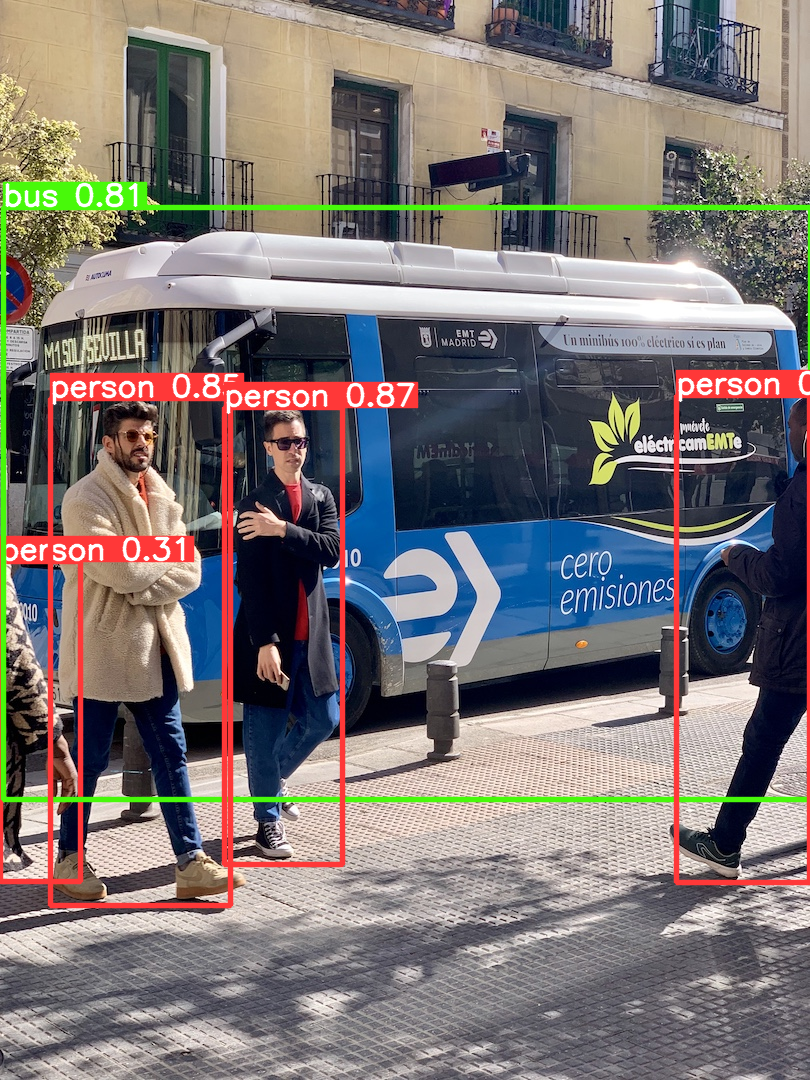

tensor([[2.24390e+02, 4.07296e+02, 3.42846e+02, 8.64891e+02, 8.70131e-01, 0.00000e+00],
        [5.01273e+01, 3.98109e+02, 2.30415e+02, 9.05300e+02, 8.51859e-01, 0.00000e+00],
        [6.76955e+02, 3.95514e+02, 8.09098e+02, 8.82952e+02, 8.33825e-01, 0.00000e+00],
        [3.71592e+00, 2.07727e+02, 8.10000e+02, 7.99407e+02, 8.11244e-01, 5.00000e+00],
        [0.00000e+00, 5.61716e+02, 8.07145e+01, 8.81593e+02, 3.08081e-01, 0.00000e+00]], device='cuda:0')


,xmin,ymin,xmax,ymax,confidence,class,name
0,224.389999,407.296112,342.845978,864.891052,0.870131,0,person
1,50.127308,398.108521,230.414719,905.299866,0.851859,0,person
2,676.954590,395.514221,809.097534,882.951599,0.833825,0,person
3,3.715919,207.726990,810.000000,799.406860,0.811244,5,bus
4,0.000000,561.715881,80.714546,881.592896,0.308081,0,person


In [5]:
img = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)


# Inference
results = model(img, size=640)  # includes NMS

# Results
results.print()  
results.show()  # or .show()

print(results.xyxy[0])  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

In [6]:
results.names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
for i in range(len(results.xyxy[0])):
  xmin,	ymin,	xmax,	ymax	=results.xyxy[0][i,0:4].tolist()
  xmin=int(xmin)
  ymin=int(ymin)
  xmax=int(xmax)
  ymax=int(ymax)
  plt.figure()
  plt.imshow(img[ymin:ymax,xmin:xmax])
  plt.show()

detect: weights=['yolov5s.pt'], source=bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 2g.10gb, 9856MiB)

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /home/jovyan/AI-HumanDetection/yolov5/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.010s)
Speed: 0.3ms pre-process, 10.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


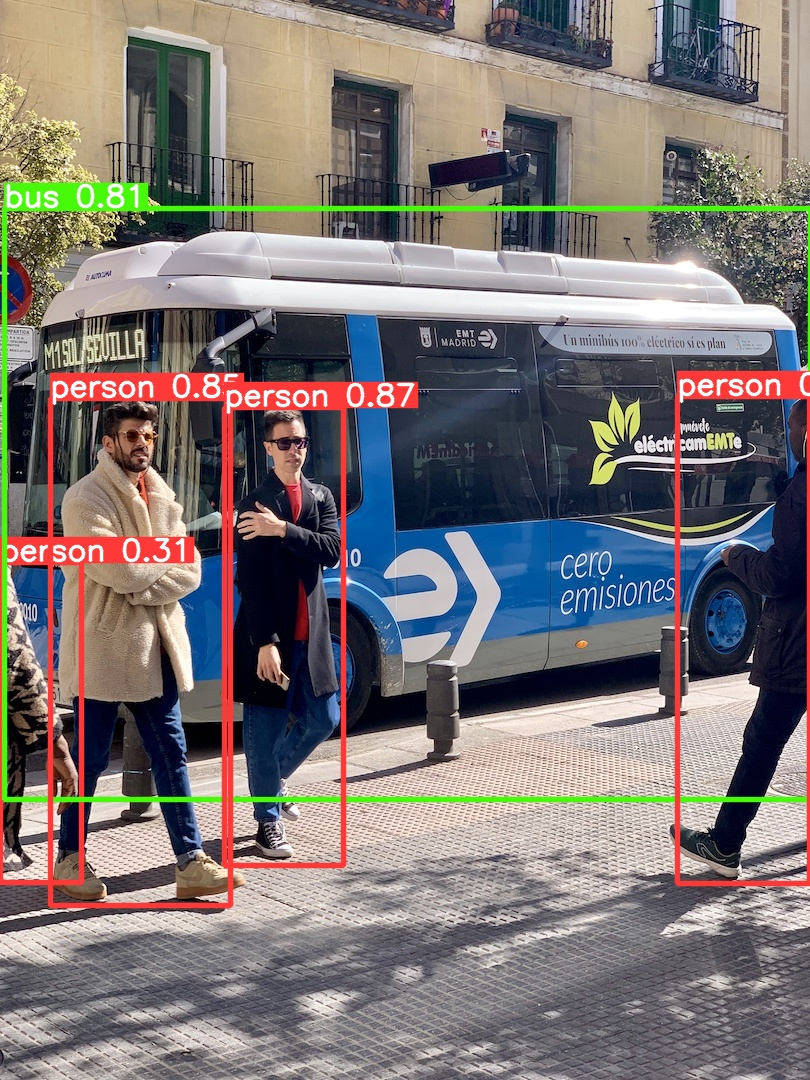

In [8]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source bus.jpg
display.Image(filename='runs/detect/exp/bus.jpg', width=600)